# XPCS&XSVS Pipeline for Single-(Gi)-SAXS Run
"This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

This notebook begins with a raw time-series of images and ends with $g_2(t)$ for a range of $q$, fit to an exponential or stretched exponential, and a two-time correlation functoin.

## Overview

* Setup: load packages/setup path
* Load Metadata & Image Data
* Apply Mask
* Clean Data: shutter open/bad frames
* Get Q-Map
* Get 1D curve
* Define Q-ROI (qr, qz)
* Check beam damage
* One-time Correlation
* Fitting
* Two-time Correlation
The important scientific code is imported from the [chxanalys](https://github.com/yugangzhang/chxanalys/tree/master/chxanalys) and [scikit-beam](https://github.com/scikit-beam/scikit-beam) project. Refer to chxanalys and scikit-beam for additional documentation and citation information.

## CHX Olog NoteBook
CHX Olog (https://logbook.nsls2.bnl.gov/11-ID/)

## Setup

Import packages for I/O, visualization, and analysis.

In [346]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from os import listdir
from os.path import isfile, join
from PIL import Image
import pandas as pds

from skimage.filters import gaussian
from skimage.filters import roberts, sobel, scharr, prewitt
#%reset -f  #for clean up things in the memory

In [352]:
%run lattice_Iq_peak.py

In [353]:
p_bcc = np.array([ 1.        ,  1.41422014,  1.73207467,  2.        ,  2.23606737,
        2.4495245 ,  2.6457341 ,  2.8283913 ,  2.99996326,  3.1622773 ,
        3.31667885,  3.46414934,  3.60549324,  3.8729722 ,  4.12311266,
        4.24266043,  4.35885116,  4.69037224,  4.89890202,  5.        ,
        5.19633425,  5.74474073,  5.83089338,  6.55770621,  7.34857349])


In [354]:
inDir = '/home/yuzhang/Data/Fang_CMS/March10/RawData/'
outDir = '/home/yuzhang/Data/Fang_CMS/March10/Image/'


inDir = '/home/yuzhang/Data/Fang_CMS/July14/RawData/'
outDir = '/home/yuzhang/Data/Fang_CMS/July14/Image/'


ResDir = '/home/yuzhang/Data/Fang_CMS/July14/Results/'

##New data (2017 July)
inDir = '/home/yuzhang/Data/Fang_CMS/July_Combined_newData/RawData/2017_Samples/'
ResDir = '/home/yuzhang/Data/Fang_CMS/July_Combined_newData/Results/'


## old data (2014 data)
#inDir = '/home/yuzhang/Data/Fang_CMS/July_Combined_newData/RawData/2014_Samples/'
#ResDir = '/home/yuzhang/Data/Fang_CMS/July_Combined_newData/Results/'

##X9 data (2014)
inDir = '/home/yuzhang/Data/Fang_CMS/X9_Data/'
ResDir = '/home/yuzhang/Data/Fang_CMS/July_Combined_newData/Results/'


In [355]:
tifs = np.array( [f for f in listdir(inDir) if isfile(join(inDir, f))] )

In [356]:
tifs

array(['FL831Mor2_821_1_5s_3_SAXS', 'FL831Mor2_L30R420_5s_3_SAXS',
       'FL831Mor2_L70R420_10s_2_SAXS', 'FL901Morn2_F4_t65_10s_1_SAXS'],
      dtype='<U28')

## check one image

In [357]:
fp = 'FL_July13_2017_707_3_0.10s_78474_saxs.tiff'

fp = 'FL_July15_2017_70R210_0.50s_79382_saxs.tiff'
fp = 'FL_July15_2017_70R420_0.50s_79366_saxs.tiff'
fp = 'FL_July15_2017_70R420_0.50s_79368_saxs.tiff'

fp = 'FL_July15_2017_713_3_0.10s_79356_saxs.tiff'
fp = 'FL_July13_2017_710_4_0.20s_78514_saxs.tiff'

fp = 'FL_July15_2017_70R420_0.50s_79368_saxs.tiff'
#fp = 'FL_July15_2017_710_10_0.50s_79392_saxs.tiff'
#fp = 'FL_July13_2017_707_1_0.10s_78458_saxs.tiff'
#fp = 'AgBH_5m_cali_5.00s_78455_saxs.tiff'
 
fp = 'FL_July13_2017_707_3_0.10s_78474_saxs.tiff'
fp = 'FL831Mor2_L70R420_10s_2_SAXS'

fp = 'FL901Morn2_F4_t65_10s_1_SAXS'
img = get_cms_img( fp, inDir )

In [358]:
img.shape

(1043, 981)

In [359]:
#im = Image.open( inDir + fp )
#imgx = np.array(im )[::-1] 

<IPython.core.display.Javascript object>


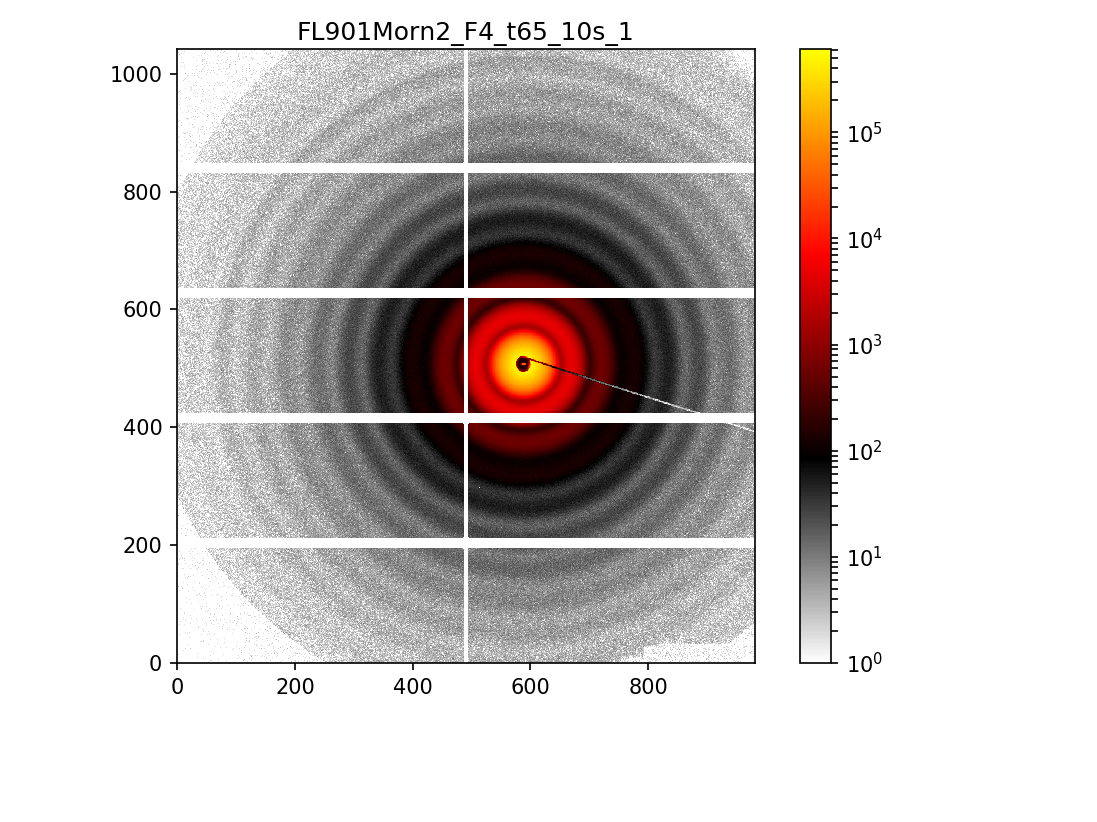

In [360]:
show_img( img, logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= fp[:-5], save=True,path=outDir)
    

# Create mask

In [ ]:
#plot1D( img[ :,560 ])

In [ ]:
(627+545)/2

In [ ]:
(478 + 535)/2.

In [ ]:
center = [    588, 506 ]

In [ ]:
%run chxanalys_link/chxanalys/chx_generic_functions.py

In [ ]:
mask_incline = create_multi_rotated_rectangle_mask( 
    img, center= [597,515], length= 600, width= 5,  angles=[ 108 ] )

In [ ]:
mask_cen = create_cross_mask(  img, center=center,
                            wy_left= 0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius= 20 )

In [ ]:
mask_window = create_cross_mask(  img, center=center,
                            wy_left= 0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius= 500 )

In [ ]:
mask_chip = create_cross_mask(  img, center= [0, 203],
                            wy_left= 0, wy_right= 10, 
                              wx_up= 0, wx_down= 0,center_radius= 0 )

mask_chip *= create_cross_mask(  img, center= [0, 415],
                            wy_left= 0, wy_right= 10, 
                              wx_up= 0, wx_down= 0,center_radius= 0 )
mask_chip *= create_cross_mask(  img, center= [0, 627],
                            wy_left= 0, wy_right= 10, 
                              wx_up= 0, wx_down= 0,center_radius= 0 )

mask_chip *= create_cross_mask(  img, center= [0, 839],
                            wy_left= 0, wy_right= 10, 
                              wx_up= 0, wx_down= 0,center_radius= 0 )
mask_chip *= create_cross_mask(  img, center= [491, 0],
                            wy_left= 0, wy_right= 0, 
                              wx_up= 10, wx_down= 0,center_radius= 0 )

In [ ]:
hmask = create_hot_pixel_mask( img, threshold = 5e19, center=center, center_radius= 100)

In [ ]:
mask = mask_incline * mask_cen * mask_chip * hmask * ~mask_window

In [ ]:
show_img(mask)

In [ ]:
show_img( (img * mask  )[:], logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= fp[:-5], save=True,path=outDir, vmin=1e-5, vmax=1e5)

In [ ]:
# to find center
#show_img( (img * ~mask_cen  )[:], logs=True, aspect= 1, cmap= cmap_albula, 
#         image_name= fp[:-5], save=True,path=outDir, vmin=1e-5, vmax=1e5)

In [ ]:
#np.save(  ResDir + 'mask_X9', mask )

In [361]:
mask_com = np.load( ResDir + 'mask_com.npy')
mask_474 = np.load( ResDir + 'mask_474.npy')
mask = mask_com.copy()
mask = np.load( ResDir + 'mask_X9.npy')

In [362]:
#enter = [    258, 65 ]
center = [     65,258 ]
center = [     506, 588 ]

inc_x0 =  center[1]
inc_y0=   center[0]

Ldet = 5.038 *1000

Ldet = 4.89 *1000
lambda_ = 0.9184
dpix = 172 *10**(-3)

exposuretime = 0.1
timeperframe = 0.1
data_dir = '/home/yuzhang/Data/Fang_CMS/July14/OneD/' 
uid = 'sid=xx'
setup_pargs=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, exposuretime=exposuretime,
        timeperframe=timeperframe, center=center, path= ResDir)

print_dict( setup_pargs )

timeperframe--> 0.1
exposuretime--> 0.1
Ldet--> 4890.0
path--> /home/yuzhang/Data/Fang_CMS/July_Combined_newData/Results/
dpix--> 0.17200000000000001
lambda_--> 0.9184
uid--> sid=xx
center--> [506, 588]


In [ ]:
show_img( img[:], logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= fp[:-5], save=True,path=outDir)

# calibrate setup parameters

In [363]:
fp = 'FL831Mor2_L70R420_10s_2_SAXS'
#fp = 'FL901Morn2_F4_t65_10s_1_SAXS'
img = get_cms_img( fp, inDir ) * mask

In [364]:
qp0, iq0, q0 = get_circular_average( img, mask , pargs=setup_pargs,save=True  )

<IPython.core.display.Javascript object>


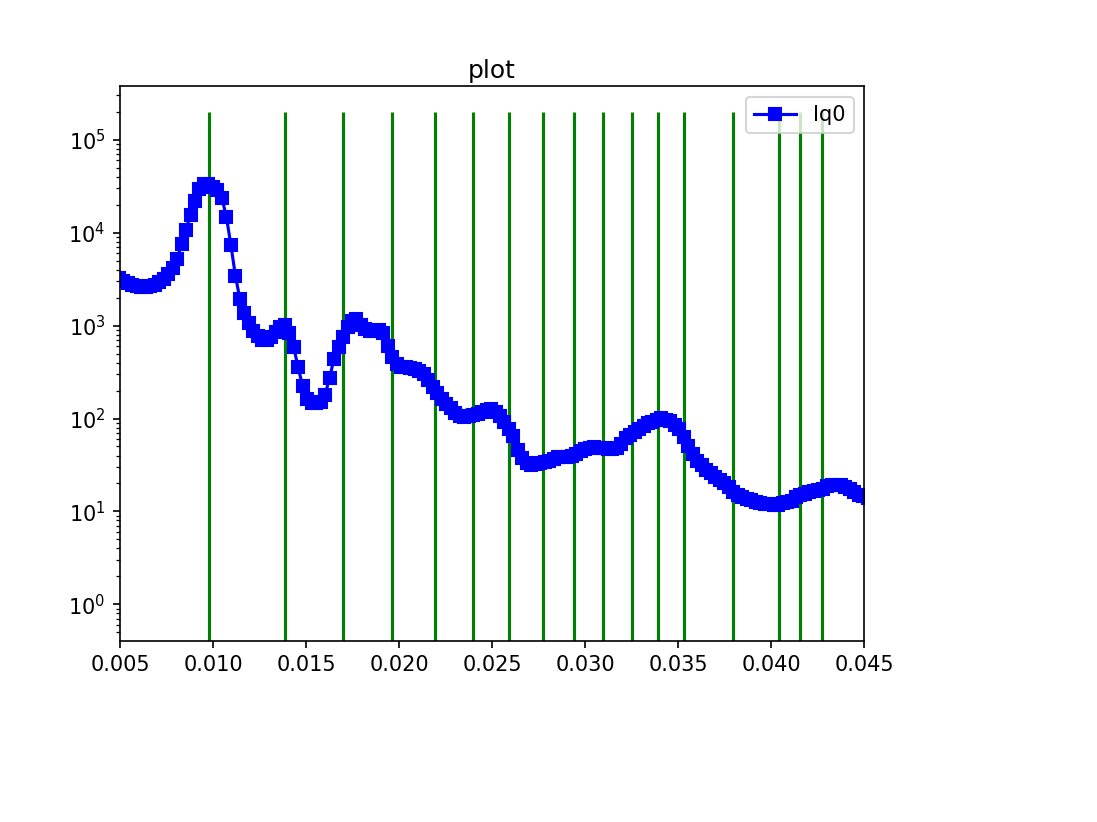

In [365]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = iq0, yerr= None, logy= True, xlim=[0.005, 0.045], ax=ax, c='b', m = 's', legend='Iq0')
 
q1 = 0.0098
ax.vlines( p_bcc * q1,  ymin=0, ymax=2e5, colors='g', linestyles='solid', label='BCC') 

# Get P(q)

In [366]:
#fp = 'FL831Mor2_L70R420_10s_2_SAXS'
fp = 'FL901Morn2_F4_t65_10s_1_SAXS'
img = get_cms_img( fp, inDir ) * mask

In [367]:
qp, pq, q = get_circular_average( img, mask , pargs=setup_pargs,save=True  )

In [368]:
#save_arrays( [q,pq], label=['q','Pq'], dtype='list', filename= 'PQ_' + 'X9_Cube_FF' + '.csv', path= ResDir, return_res=False)


<IPython.core.display.Javascript object>


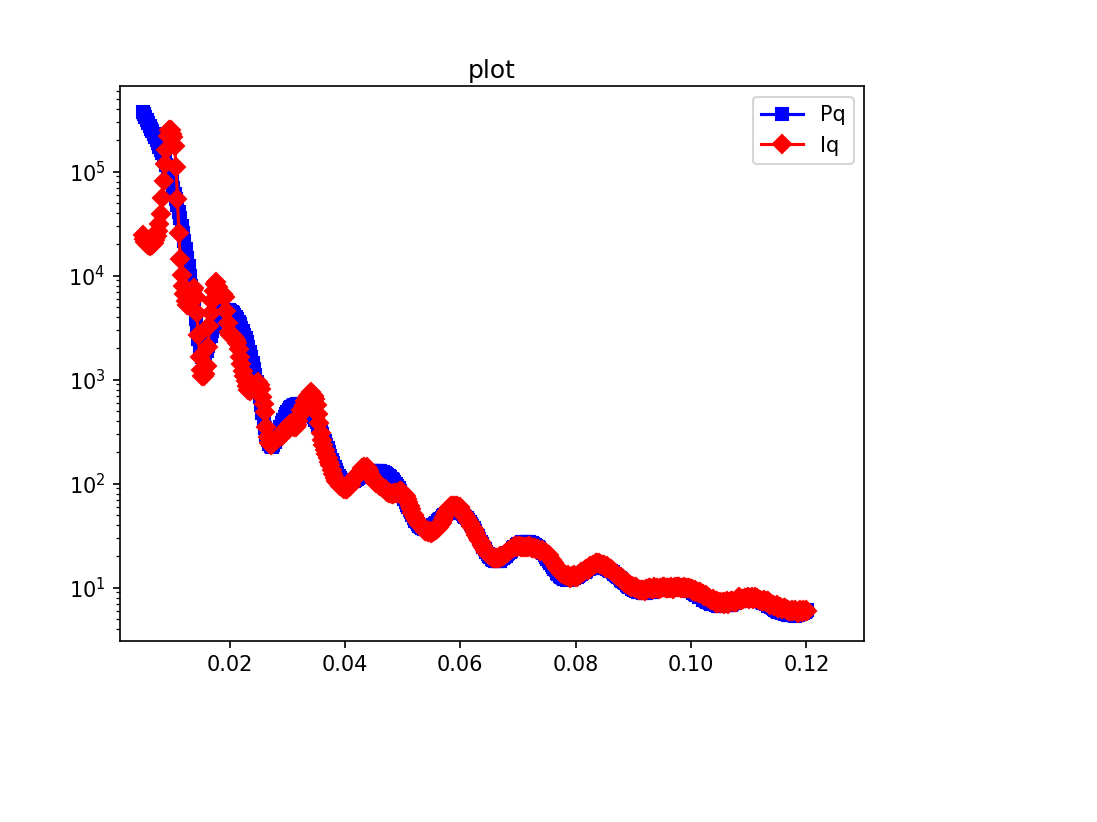

In [369]:
fig ,ax = plt.subplots(  )
plot1D( x = q, y = pq + 2, yerr= None, logy= True, xlim=[0.001, 0.13], ax=ax, c='b', m = 's', legend='Pq')
plot1D( x = q, y = iq0 * 7.5 + 0, yerr= None, logy= True, xlim=[0.001, 0.13], ax=ax, c='r', m = 'D', legend='Iq')

# Filter image to get S(q)

In [370]:
#PQ = pds.read_csv( ResDir + 'Cube_L70_July2014_829_2_qIq.csv')  #for old L70 data
#pq = PQ['79521']

#PQ = pds.read_csv( ResDir + 'Cube_L70_July2017_707_4_qIq.csv')  #for new L70 data form factor
#pq = PQ['78872']

PQ = pds.read_csv( ResDir + 'PQ_X9_Cube_FF.csv')  #for new L70 data form factor
pq = PQ['Pq']
 

In [371]:
#plot1D(x=PQ.q, y= pq, logy=True)

In [382]:
fp = 'FL_July15_2017_70R420_0.50s_79368_saxs.tiff'
fp = 'FL_July15_2017_70R210_0.50s_79382_saxs.tiff'
#fp = 'FL_July15_2017_710_10_0.50s_79392_saxs.tiff'
#fp = 'FL_July13_2017_707_1_0.10s_78458_saxs.tiff'
#fp = 'AgBH_5m_cali_5.00s_78455_saxs.tiff' 
#fp = 'FL_July15_2017_70R420_0.50s_79366_saxs.tiff'
#fp = 'FL_July15_2017_70R420_0.50s_79368_saxs.tiff'

fp = 'FL_July13_2017_707_3_0.10s_78474_saxs.tiff'
fp = 'FL_July13_2017_707_3_0.10s_78475_saxs.tiff'
#fp = 'FL_July13_2017_707_3_0.10s_78477_saxs.tiff'

fp = 'FL831Mor2_L70R420_10s_2_SAXS'  #X9_L70
fp = 'FL831Mor2_821_1_5s_3_SAXS' #X9 L70
#img = get_cms_img( fp, inDir ) * mask_com * mask_474
#fp = 'FL901Morn2_F4_t65_10s_1_SAXS'
img = get_cms_img( fp, inDir ) * mask
img_ = gray2rgb(img)


In [383]:
img.shape

(1043, 981)

In [384]:
%run ~/chxanalys_link/chxanalys/chx_generic_functions.py

In [385]:
center

[506, 588]

In [386]:
#w = create_wedge(  img, center, 550, [981, 47], [901, 1043], acute_angle= False)
#w = create_wedge(  img, center, 550, [ [600, 850, 850, 600 ], [0,0,1043, 1043]], acute_angle= True)
w = create_wedge(  img, center, 550, [ [981, 981, 0,0 ], [ 800,1043, 1043, 600]], acute_angle= True)

[588 981 981   0   0] [ 506  800 1043 1043  600]


<IPython.core.display.Javascript object>


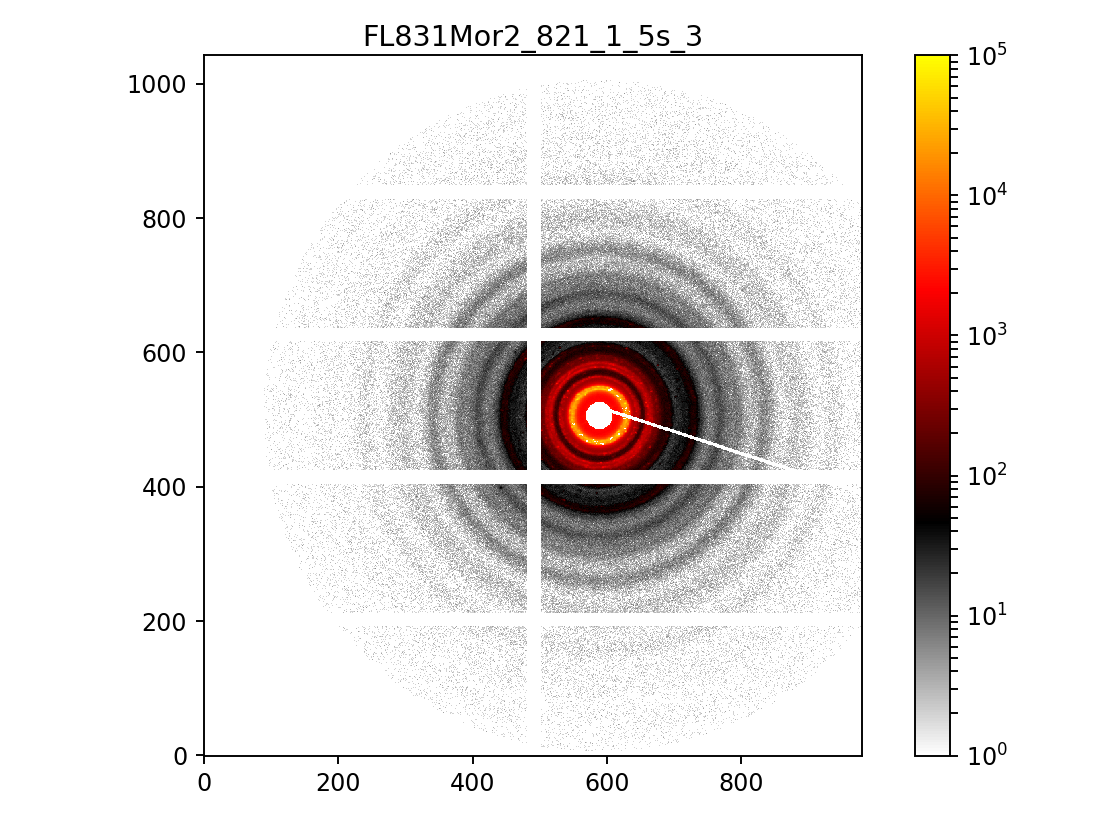

In [387]:
show_img( img[:] , logs=True, aspect= 1, cmap= cmap_albula,vmin= 1e0, vmax=1e5,
         image_name= fp[:-5], save=True,path=outDir)

# Wedges of circle

In [388]:
from chxanalys.XPCS_SAXS import get_angular_mask

In [389]:
ang_mask, ang_center, edges  = get_angular_mask( mask,  inner_angle= -180, outer_angle = 180,
                                        width = 20-0.1, edges = None,
                     num_angles = 18, center = center, dpix=[dpix, dpix]  )

<IPython.core.display.Javascript object>


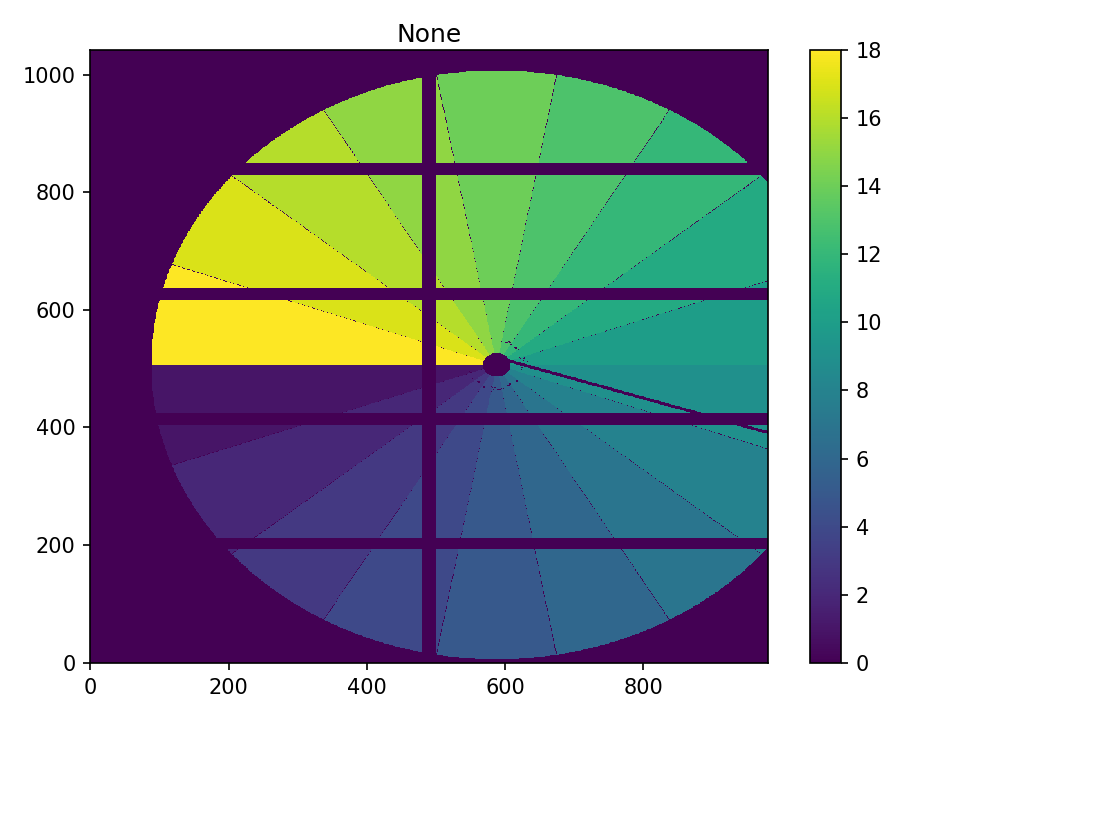

In [390]:
show_img( ang_mask  )

In [391]:
m = [   np.array(ang_mask==i, dtype = np.int64)    for i in np.unique( ang_mask )[1:] ] 

In [392]:
qp0, iq0, q0 = get_circular_average( img, mask , pargs=setup_pargs,save=True  )
Sq0 = get_Sq( q0,iq0, pq, qstart=0.017, qend=0.04, bk_qstart=0.05, bk_qend=0.12,  plot=False)
    

k for Sq scale is: 0.10556653334
background for Sq scale is: 0.384819722177


### get all S(q) of different wedges

In [393]:
#qxs = {} #np.zeros( [len(q0), len(m)])
iqxs ={} #np.zeros( [len(q0), len(m)])
sqxs = {} #np.zeros( [len(q0), len(m)])

In [394]:
for i in range( len(m)):    
    w = m[i]
    qpx, iqx, qx = get_circular_average(img*w, mask *w , pargs=setup_pargs,save=True  )    
    #if len(pq)!=len(qx):
    #    pqx = np.interp(qx, q0, pq  )
    #else:
    #    pqx=pq    
    iqx_ = np.interp( q0, qx, iqx  )
    Sqx = get_Sq( q0,iqx_, pq, qstart=0.017, qend=0.04, bk_qstart=0.05, bk_qend=0.12,  plot=False)
    
    #qxs[i]= qx
    iqxs[i]= iqx_
    sqxs[i]= Sqx
    

k for Sq scale is: 0.104170738165
background for Sq scale is: -0.0796024465696
k for Sq scale is: 0.0982477672531
background for Sq scale is: 1.36810346828
k for Sq scale is: 0.0995573242002
background for Sq scale is: 1.07627969628
k for Sq scale is: 0.104584765164
background for Sq scale is: -0.174404301065
k for Sq scale is: 0.0995776708792
background for Sq scale is: 0.54009061198
k for Sq scale is: 0.10179413858
background for Sq scale is: 0.831371951004
k for Sq scale is: 0.112479591143
background for Sq scale is: 0.193048080286
k for Sq scale is: 0.107955040326
background for Sq scale is: 0.959818327893
k for Sq scale is: 0.10553680599
background for Sq scale is: 1.25229244348
k for Sq scale is: 0.105439583892
background for Sq scale is: 0.0979435317377
k for Sq scale is: 0.101603371387
background for Sq scale is: 1.08195453027
k for Sq scale is: 0.102979216169
background for Sq scale is: 0.810124981411
k for Sq scale is: 0.110240640372
background for Sq scale is: -0.35235134316

In [ ]:
#qxs[17]

<IPython.core.display.Javascript object>


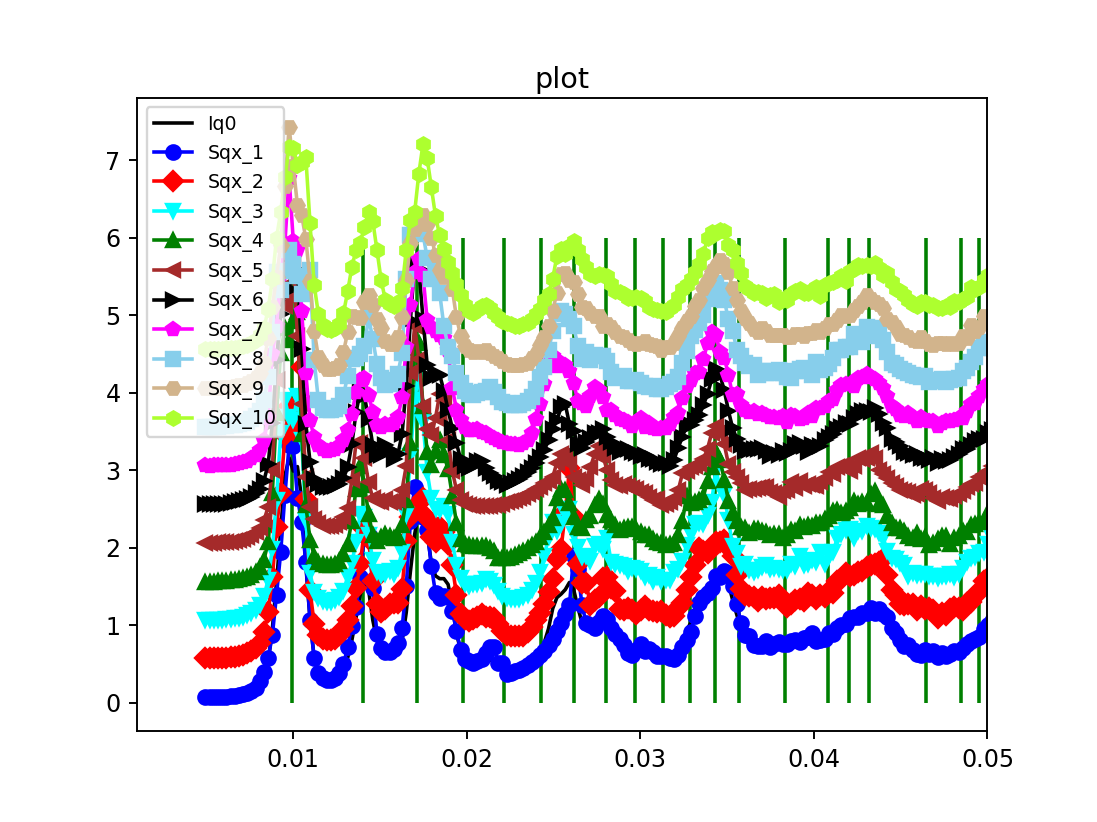

In [672]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = Sq0, yerr= None, logy= False, xlim=[0.001, 0.05], ax=ax, c='k', m = '', ls ='-', legend='Iq0')
#for i in list( sqxs.keys()):
#for i in range(0,10):
n=0
for i in range(0,10):
    
    sqx_ = sqxs[i]
    plot1D( x = q0, y = sqx_ + n* 0.5, logy= False, xlim=[0.001, 0.05], ax=ax, c=colors[i],
           m = markers[i], legend='Sqx_%s'%(i+1), legend_size= 8)
    n +=1
q1 = 0.0099
ax.vlines( p_bcc * q1,  ymin=0, ymax=6, colors='g', linestyles='solid', label='BCC')

In [ ]:
ResDir

In [ ]:
sqx  = (sqxs[4] + sqxs[12] + sqxs[13] + sqxs[14]  )/4.
sqx  = ( sqxs[12] + sqxs[13] + sqxs[14])/3.

In [ ]:
fig ,ax = plt.subplots(  )
#plot1D( x = q0, y = Sq0, yerr= None, logy= False, xlim=[0.001, 0.05], ax=ax, c='b', m = 's', ls ='-', legend='Sq0')
plot1D( x = q0, y = sqx + 0*0.5, yerr= None, logy= False, xlim=[0.001, 0.05], ax=ax, c='r', m = 'D', ls ='-', legend='SqX')




# save data by combining some good data

In [ ]:
save_arrays( [q0,sqx], label=['q','FL831Mor2_821_1_5s_3_SAXS_Sq'], dtype='list',
            filename= 'Sq_' + 'FL831Mor2_821_1_5s_3_SAXS' + '.csv', 
            path= ResDir, return_res=False)

In [ ]:
fp

# Try to fit Sq here

In [ ]:
data.columns

In [225]:
%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k','jupyter-notebook:move-cell-up');
// replacing IPython with Jupyter should work as well:
IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j','jupyter-notebook:move-cell-down');

<IPython.core.display.Javascript object>

In [102]:
cd ~/Analysis/Fang_CMS/

/home/yuzhang/Analysis/Fang_CMS


In [256]:
%run lattice_Iq_peak.py

In [395]:
data = pds.read_csv( ResDir +  'Sq_' + 'FL831Mor2_821_1_5s_3_SAXS' + '.csv'  )
q = data.q
sq = data['FL831Mor2_821_1_5s_3_SAXS_Sq']

In [227]:
#fig ,ax = plt.subplots(  )
#plot1D( x = q/0.00948, y = sq, yerr= None, logy= False, xlim=[0.5, 5], ax=ax, c='r', m = 'D', ls ='-', legend='Sq')
#ax.vlines( p_bcc ,  ymin=0, ymax= 5, colors='g', linestyles='solid', label='BCC')

In [230]:
peaks= np.array([0.0093, 0.0102, 0.0139, 0.0175, 0.0189, 0.0259, 0.0348])
print( peaks/0.0093 )


[ 1.          1.09677419  1.49462366  1.88172043  2.03225806  2.78494624
  3.74193548]


In [229]:
#ndis_dict

In [232]:
dis_dict = get_bct_dislist(a=1, c = 1,   hm= 4 ) 
pr = get_peak_ratio(dis_dict)
print(pr)
#bct_p

[ 1.          1.41421356  1.73205081  2.          2.23606795  2.44948978
  2.64575133  2.82842712  3.          3.16227762  3.31662473  3.46410153
  3.60555118  3.99999989  4.1231055   4.2426406   4.89897939]


In [233]:
hkl = [ '101', '110', '200', '211', '202', '312', '413' ]
peaks= np.array([0.0093, 0.0102, 0.0139, 0.0175, 0.0189, 0.0259, 0.0348])
#p = np.array( [ndis_dict[k] for k in hkl] )

In [274]:
hkl = [   '200', '211', '202', '312', '413' ]
peaks= np.array([  0.0139, 0.0175, 0.0189, 0.0259, 0.0348])
#p = np.array( [ndis_dict[k] for k in hkl] )

In [299]:
%run detect_peak.py

In [578]:
peaks,_ = peakdetect(sq, lookahead= 6, delta=0)
px, py = zip(*peaks)
px = np.array(px);py=np.array(py)
peakx = np.array( q[px] )

<IPython.core.display.Javascript object>


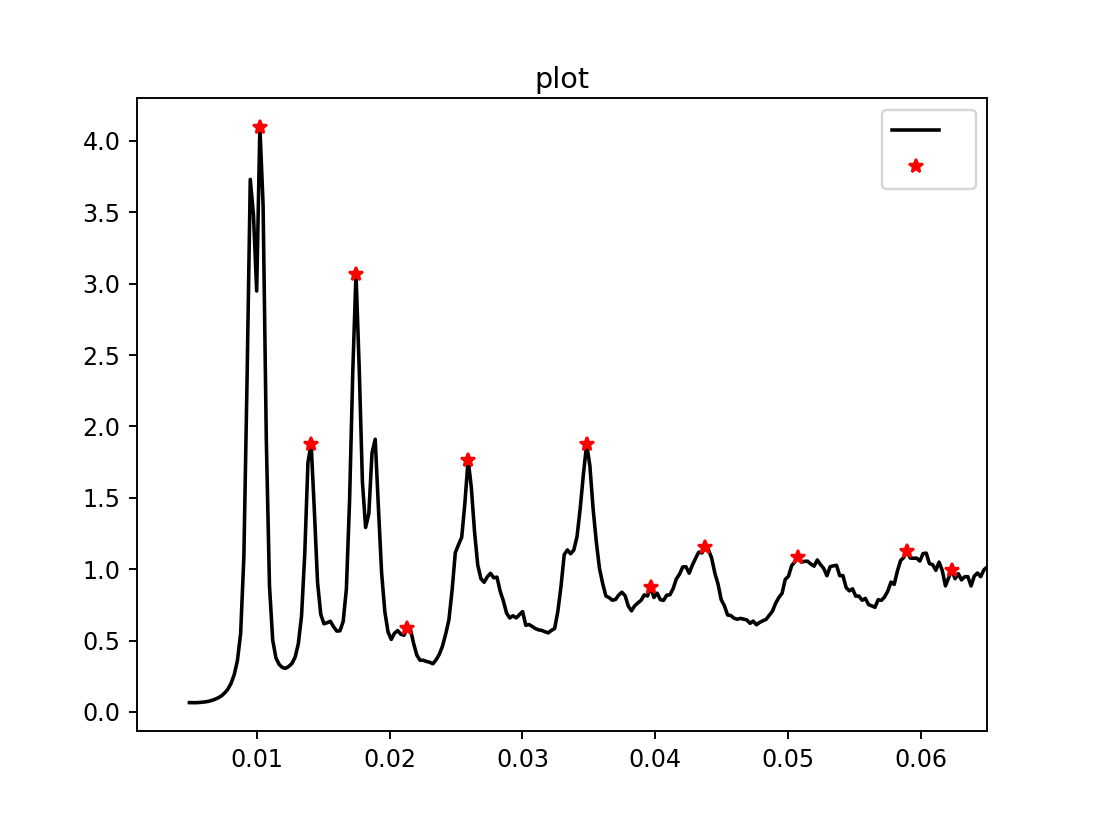

In [579]:
fig, ax = plt.subplots()
plot1D( x =q, y = sq, ax =ax, ls='-', m='', c='k')
plot1D( x =peakx , y = py, ax =ax, ls='', m='*', c='r', xlim=[0.001, 0.065])

In [419]:
ind

array([ 0.,  2.,  5.,  5.])

In [275]:
d1 =  2*np.pi/0.0093
d2 =  2*np.pi/0.0102
a0 = np.sqrt(2)  * d2
c0 = np.sqrt(  1/ (  1/d1**2 - 1/a0**2   ) )
print( a0, c0  ) 

871.153517286 1070.18590476


In [526]:

def get_peak_pos( x, paras):    
    #(b, A, xc, w,) = p
    para = paras.valuesdict() 
    (a,c) = para['a'], para['c']       
    ndis_dict = get_bct_hkl_dis(a=a,c = c,   hm= 4 )
    q = np.zeros( len(x) )
    for i, xi in enumerate(x):
        q[i] = 2*np.pi/ndis_dict[xi] 
    return np.sort(q)


def get_bct_peaks(   paras):    
    #(b, A, xc, w,) = p
    para = paras.valuesdict() 
    (a,c) = para['a'], para['c']       
    ndis_dict = get_bct_hkl_dis(a=a,c = c,   hm= 6 )
    #q = np.zeros( len(x) )
    #for i, xi in enumerate(x):
    #    q[i] = 2*np.pi/ndis_dict[xi] 
    return  np.sort(2*np.pi/np.array( list(ndis_dict.values())  ))


def pos_residual( paras, x,  data): 
    para = paras.valuesdict()       
    model = get_bct_peaks(    paras)
    #print(model)
    #print(  model[map_a1_in_a2( data, model )] )
    m =  model[ map_a1_in_a2( data, model ) ]
    
    return m- data

def map_a1_in_a2(a1, a2):
    '''find the closest value of a1 in a2, return the index
    '''
    a1 = np.sort(a1)
    a2 = np.sort(a2)
    ind = np.zeros( len(a1), dtype=int)
    for i,v in enumerate(a1):
        ind[i] = np.argmin( np.abs(a2 - v ))
        
    return ind

In [582]:
 
paras = Parameters()
paras.add('a',   value= a0,  min=0)
paras.add('c', value= c0)

In [583]:
#x= hkl
x=0

In [611]:
peakx = np.array( [  0.01,0.014,0.0174,0.0187,0.0212,0.0259,0.0276,0.3,0.0345,0.0438       ])

In [612]:
result = minimize(pos_residual, paras, args=( x, peakx[0:] ),  method='leastsq')

In [613]:
report_fit( result )

[[Fit Statistics]]
    # function evals   = 50
    # data points      = 10
    # variables        = 2
    chi-square         = 0.071
    reduced chi-square = 0.009
    Akaike info crit   = -45.462
    Bayesian info crit = -44.856
[[Variables]]
    a:   856.898202 +/- 1.30e+03 (151.13%) (init= 871.1535)
    c:   1013.83714 +/- 3.11e+03 (306.66%) (init= 1070.186)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, c)                      = -0.603 


In [644]:
a,c = result.params['a'].value,result.params['c'].value
print(a,c,c/a)

856.898202618 1013.83714732 1.18314771138


In [607]:
#c =  2/np.sqrt(3) * 878.71

In [621]:
c/a

1.1831477113835833

In [645]:
dis_fit = get_bct_dislist(a=a, c = c,   hm= 6 ) 

pf = get_q_from_disDict( dis_fit )

In [669]:
dis_fit = get_bct_dislist(a=a, c = a*1.14,   hm= 6 ) 

pf = get_q_from_disDict( dis_fit )
pf = pf/pf[0] * 0.00946


<IPython.core.display.Javascript object>


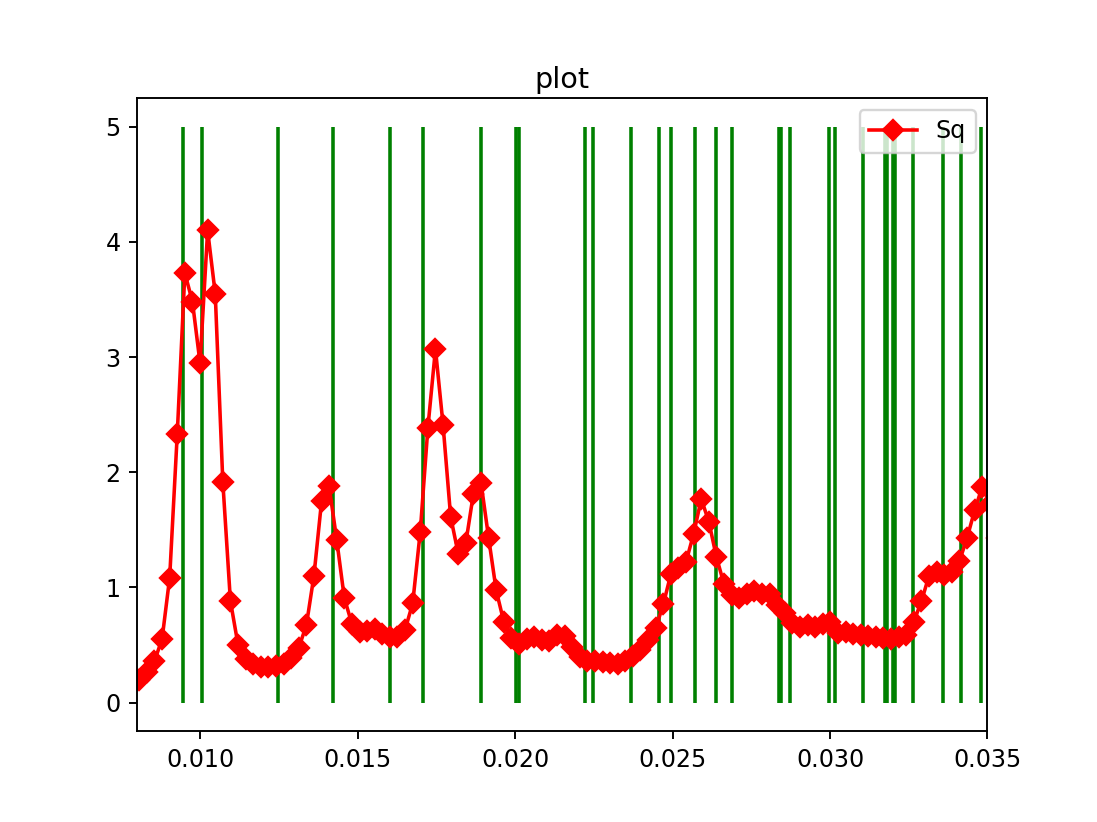

In [678]:
fig ,ax = plt.subplots(  )
 
    
plot1D( x = q, y = sq, yerr= None, logy= False, xlim=[0.008, 0.035], ax=ax, c='r', m = 'D', ls ='-', legend='Sq')
#plot1D( x = q0, y = Sq0, yerr= None, logy= False, xlim=[0.008, 0.045], ax=ax, c='b', m = 's', ls ='-', legend='Sq')
#plot1D( x = q0, y = sqxs[0], yerr= None, logy= False, xlim=[0.008, 0.045], ax=ax, c='b', m = 's', ls ='-', legend='Sq')
#ax.vlines( p_bcc* 0.0098 ,  ymin=0, ymax= 5, colors='g', linestyles='solid', label='BCC')

#ax.vlines( pr* 0.0095 ,  ymin=0, ymax= 5, colors='g', linestyles='solid', label='BCC')
ax.vlines( pf ,  ymin=0, ymax= 5, colors='g', linestyles='solid', label='BCC')


In [436]:
a1 = np.array( [1,2,3,4,5,6] )
a2 = np.array([1.1, 3.5, 5.6, 5.8])

In [437]:
 map_a1_in_a2( np.array(q[px][:15]), pf)

array([  1.,   3.,   5.,   6.,   9.,  14.,  16.,  20.,  30.,  34.,  40.,
        53.,  71.,  78.,  88.])

In [438]:
np.array(q[px][:15])

array([ 0.0102384 ,  0.0140966 ,  0.01747251,  0.01891933,  0.02133069,
        0.02591225,  0.02760019,  0.03001153,  0.03483417,  0.03748661,
        0.03965677,  0.04375595,  0.05074858,  0.05364205,  0.05894669])

In [450]:
#sorted(dict_hkl, key=dict_hkl.get, reverse=True) 

In [444]:
dict_hkl

{'002': 500.46151200000003,
 '004': 250.23075600000001,
 '101': 661.83147284999995,
 '103': 312.06985745999998,
 '110': 623.82179977999999,
 '112': 390.3658231,
 '114': 232.24319033,
 '200': 441.10862487000003,
 '202': 330.91573642999998,
 '204': 217.64931189000001,
 '211': 367.05331869000003,
 '213': 254.76068681000001,
 '220': 311.91089989,
 '222': 264.70831408999999,
 '224': 195.18291155,
 '301': 282.1470865,
 '303': 220.61049095000001,
 '310': 278.98159003000001,
 '312': 243.67769594999999,
 '314': 186.27788584000001,
 '321': 237.68415236999999,
 '323': 197.30996913999999,
 '330': 207.94059992999999,
 '332': 192.02476854,
 '334': 159.92812950999999,
 '400': 220.55431243999999,
 '402': 201.82442602,
 '404': 165.45786820999999,
 '411': 209.24152025000001,
 '413': 180.11241783,
 '420': 197.26977414000001,
 '422': 183.52665934999999,
 '424': 154.91816419,
 '431': 173.76425141000001,
 '433': 155.97530825000001,
 '440': 155.95544993999999,
 '442': 148.89347140999999,
 '444': 132.35415703

In [441]:
dict_hkl = get_bct_hkl_dis(a,c,4)

In [143]:
data = np.loadtxt('/home/yuzhang/Analysis/Fang_CMS/BCT_DI')
bct_dis, bct_int = data[:,0], data[:,1]
bct_int /= bct_int[0]/100
bct_p = bct_dis[0]/bct_dis

In [42]:
7.28/7.07

1.0297029702970297

In [22]:
#plot1D( x = 1/bct_dis, y= bct_int)

<IPython.core.display.Javascript object>


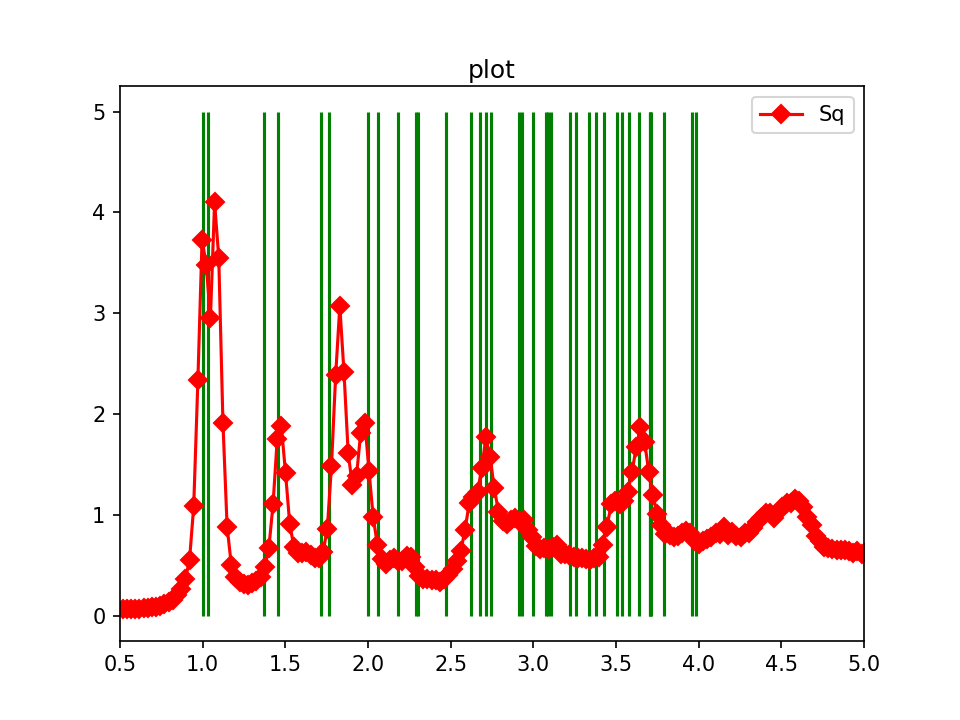

In [30]:
fig ,ax = plt.subplots(  )
 
p1 = 0.00955    
    
plot1D( x = q/p1, y = sq, yerr= None, logy= False, xlim=[0.5, 5], ax=ax, c='r', m = 'D', ls ='-', legend='Sq')
#plot1D( x = q, y = Sq0, yerr= None, logy= False, xlim=[0.001, 0.035], ax=ax, c='r', m = 'D', ls ='-', legend='Sq')


ax.vlines( bct_p ,  ymin=0, ymax= 5, colors='g', linestyles='solid', label='BCC')

In [ ]:
a= 1
b=a
c=   k_
ang_MK = 90#110.92483242763834  #109.47122063449069
alp=ang_MK
bet = alp
gam = alp


In [ ]:
hm=3
dc_bct =  get_hkl_dis(a, b, c, alp, bet, gam, hm, hm,hm)
d_bct = np.array( list( sorted(dc_bct.keys(), reverse=True) ))
p_bct = d_bct[0]/d_bct 

In [ ]:
qp0, iq0, q0 = get_circular_average( img, mask , pargs=setup_pargs,save=True  )
qpx, iqx, qx = get_circular_average(img*w, mask *w , pargs=setup_pargs,save=True  )


Sq0 = get_Sq( q0,iq0, pq, qstart=0.017, qend=0.04, bk_qstart=0.05, bk_qend=0.12,  plot=False)
Sqx = get_Sq( qx,iqx, pq, qstart=0.017, qend=0.04, bk_qstart=0.05, bk_qend=0.12,  plot=False)

In [ ]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = iq0, yerr= None, logy= True, xlim=[0.001, 0.05], ax=ax, c='b', m = 's', legend='Iq0')
plot1D( x = qx, y = iqx, logy= True, xlim=[0.001, 0.04], ax=ax, c='r', m = 'D', legend='Iqx')

q1 = 0.0099
ax.vlines( p_bcc * q1,  ymin=0, ymax=2e4, colors='g', linestyles='solid', label='BCC')

In [ ]:
fig ,ax = plt.subplots( )
plot1D( x = q0, y = Sq0, logy= False, xlim=[0.001, 0.06], ax=ax, c='b', m = 's', legend='Sq0')
plot1D( x = qx, y = Sqx +1, logy= False, xlim=[0.005, 0.055], ax=ax, c='r', m = 's', legend='Sqx', title=fp)
#plot1D( x = qx, y = np.ones_like(Sqx), logy= False, xlim=[0.005, 0.06], ax=ax, c='k', m = '',ls='-', legend='',  )


ax.vlines( p_bcc * q1,  ymin=0, ymax=5.5, colors='g', linestyles='solid', label='BCC')
#fig.tight_layout()

# Method one apply kernel to sharpen image

In [ ]:
#x = gaussian(img, sigma=0.4)

x = sobel(img * mask )
#x = scharr(img * mask_com)
x = prewitt(img * mask)
#x = roberts(img * mask_com)


In [ ]:
show_img( (x)[:] *1e6 , logs=True, aspect= 1, cmap= cmap_albula, vmin= 1e-8, vmax=1e1,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
imgc = get_two_combined_images( img, x, ypos=65)

In [ ]:
pq.shape

In [ ]:
#show_img( (imgc)[:400] , logs=True, aspect= 1, cmap= cmap_albula, vmin= 1e-8, vmax=1e5,
#         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = iq0, yerr= None, logy= True, xlim=[0.001, 0.05], ax=ax, c='b', m = 's', legend='Iq0')
plot1D( x = qx, y = iqx * 1e9, logy= True, xlim=[0.001, 0.04], ax=ax, c='r', m = 'D', legend='Iqx')

q1 = 0.0099
ax.vlines( p_bcc * q1,  ymin=0, ymax=2e4, colors='g', linestyles='solid', label='BCC')

In [ ]:
fp

In [ ]:


fig ,ax = plt.subplots( )
plot1D( x = q0, y = Sq0, logy= False, xlim=[0.001, 0.06], ax=ax, c='b', m = 's', legend='Sq0')
plot1D( x = qx, y = Sqx, logy= False, xlim=[0.005, 0.06], ax=ax, c='r', m = 's', legend='Sqx', title=fp)
#plot1D( x = qx, y = np.ones_like(Sqx), logy= False, xlim=[0.005, 0.06], ax=ax, c='k', m = '',ls='-', legend='',  )


ax.vlines( p_bcc * q1,  ymin=0, ymax=6.5, colors='g', linestyles='solid', label='BCC')
#fig.tight_layout()

In [ ]:
%run ~/chxanalys_link/chxanalys/XPCS_SAXS.py

In [ ]:
def get_cirucular_average_std(  img, mask, setup_pargs, img_name='xx'  ):
    '''YG. develop at CHX, 2017 July 18,
    Get the standard devation of tge circular average of img
    image-->I(q)-->image_mean--> (image- image_mean)**2 --> I(q) --> std = sqrt(I(q))
    '''
    qp, iq, q = get_circular_average( img, mask , pargs=setup_pargs, save= False  )
    center = setup_pargs['center']
    img_ = ( img - recover_img_from_iq(  qp, iq, center, mask) )**2
    qp_, iq_, q_ = get_circular_average( img_, mask , pargs=setup_pargs,save= False  )
    std = np.sqrt(iq_)  
    return qp, iq, q,std

In [ ]:
#qp0, iq0, q0  = get_circular_average(  img, mask, setup_pargs, img_name='xx'  )

qp0, iq0, q0, std0 = get_cirucular_average_std(  img, mask, setup_pargs, img_name='xx'  )
imgr =  recover_img_from_iq(  qp0, iq0, center, mask)

stdr =  recover_img_from_iq(  qp0, std0, center, mask)

In [ ]:
#stdr.max(), img.max(), (stdr).min(), (stdr/(imgr)).max()

In [ ]:
k = 3
z = np.where(  (img > imgr + stdr * k)  | (img < imgr - stdr *k ) )

In [ ]:
m = np.ones_like( img )
m[z] = 1e1

In [ ]:
m = np.ones_like( img )
m[z] = 0

In [ ]:
#np.unique(m)

In [ ]:
show_img( (m)[:])

In [ ]:
#show_img( (m)[:400] , logs=True, aspect= 1, cmap= cmap_albula, vmin= 1e-8, vmax=1e5,
#         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
show_img( (img*m)[:], logs=True, aspect= 1, cmap= cmap_albula,vmin= 1e-3, vmax=1e5,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
qp0, iq0, q0 = get_circular_average( img, mask , pargs=setup_pargs,save=True  )
qpx, iqx, qx = get_circular_average( img*m, mask , pargs=setup_pargs,save=True  )

#qpx, iqx, qx = get_circular_average( m, mask , pargs=setup_pargs,save=True  )


Sq0 = get_Sq( q0,iq0, pq, qstart=0.017, qend=0.04, bk_qstart=0.05, bk_qend=0.12,  plot=False)
Sqx = get_Sq( qx,iqx, pq[:len(qx)],qstart=0.017, qend=0.04, bk_qstart=0.05, bk_qend=0.12,  plot=False)


#qpx, iqx, qx  = get_circular_average(  img stdr, mask, setup_pargs, img_name='xx'  )

In [ ]:
#qp0, iq0, q0, std0 = get_cirucular_average_std(  img, mask, setup_pargs, img_name='xx'  )

In [ ]:
plot1D( x = qx, y = iqx, logy= True, xlim=[0.001, 0.08], c='r', m = 'D', legend='Iqx')


In [ ]:
fig ,ax = plt.subplots( )
plot1D( x = q0, y = Sq0, logy= False, xlim=[0.001, 0.06], ax=ax, c='b', m = 's', legend='Sq0')
plot1D( x = qx, y = Sqx + 0, logy= False, xlim=[0.005, 0.04], ax=ax, c='r', m = 's', legend='Sqx')

ax.vlines( p_bcc * q1,  ymin=0, ymax=5.5, colors='g', linestyles='solid', label='BCC')
#fig.tight_layout()

In [ ]:
#p_bcc**2

In [ ]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = iq0, yerr= std0, logy= True, xlim=[0.001, 0.05], ax=ax, c='b', m = 's', legend='Iq0')
plot1D( x = qx, y = iqx * 1e-1, logy= True, xlim=[0.001, 0.08], ax=ax, c='r', m = 'D', legend='Iqx')

ax.vlines( p_bcc *q1,  ymin=0, ymax=2e4, colors='g', linestyles='solid', label='BCC')
#fig.tight_layout()

In [ ]:
fig ,ax = plt.subplots(  )
plot1D( x = q0, y = iq0 , yerr= std0, logy= True, xlim=[0.001, 0.07], 
       ax=ax, c='b', m = '', legend='Iq0')
#plot1D( x = qx, y = iqx * 1e-1, logy= True, xlim=[0.001, 0.08], ax=ax, c='r', m = 'D', legend='Iqx')

ax.vlines( p_bcc * q1,  ymin=0, ymax=2e4, colors='g', linestyles='solid', label='BCC')
#fig.tight_layout()

# look at the image by substact mean_img reversed from S(q)

In [ ]:
yr = np.abs( get_delta_img(  img, mask, setup_pargs, img_name='xx' ) )

In [ ]:
yr_ = np.zeros_like(yr) #yr.copy()

yr_[np.where( (yr >=0.01) & (yr <0.1) )]=1e2

In [ ]:
#yr =   get_delta_img(  img, mask, setup_pargs, img_name='xx' )  **2

In [ ]:
show_img( (yr_)[:] , logs= True, aspect= 1, cmap= cmap_albula, vmin= 2e-2, vmax= 1e3,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
qpy, iqy, qy = get_circular_average( yr_, mask , pargs=setup_pargs,save=True  )
plot1D( x = qy, y = iqy, logy= True, xlim=[0.001, 0.12], c='r', m = 'D', legend='Iqy')

In [ ]:
fp = 'FL831Mor2_L70R420_10s_2_SAXS'  #X9_L70
#img = get_cms_img( fp, inDir ) * mask_com * mask_474
fp = 'FL901Morn2_F4_t65_10s_1_SAXS'
img = get_cms_img( fp, inDir ) * mask
img_ = gray2rgb(img)

In [ ]:
yr = np.abs( get_delta_img(  img, mask, setup_pargs, img_name='xx' ) )
yr_ = np.zeros_like(yr) #yr.copy()

yr_[np.where( (yr >=0.01) & (yr <0.1) )]=1e2

In [ ]:
show_img( (yr_)[:] , logs= True, aspect= 1, cmap= cmap_albula, vmin= 5e-2, vmax= 1e3,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
qpy, iqy, qy = get_circular_average( yr_, mask , pargs=setup_pargs,save=True  )
plot1D( x = qy, y = iqy, logy= True, xlim=[0.001, 0.12], c='r', m = 'D', legend='Iqy')

In [ ]:
qp0, iq0, q0 = get_circular_average( img, mask , pargs=setup_pargs,save=True  )
qpx, iqx, qx = get_circular_average( y, mask , pargs=setup_pargs,save=True  )

Sq0 = get_Sq( q,iq0, pq, qstart=0.02, qend=0.08, bk_qstart=0.06, bk_qend=0.14,  plot=False)
Sqx = get_Sq( q,iqx, pq, qstart=0.02, qend=0.08, bk_qstart=0.06, bk_qend=0.14,  plot=False) 

In [ ]:
fig ,ax = plt.subplots( figsize=[6,4])
plot1D( x = q, y = iq0, logy= False, xlim=[0.001, 0.06], ax=ax, c='b', m = 's', legend='Iq0')
plot1D( x = q, y = iqx, logy= True, xlim=[0.005, 0.06], ax=ax, c='r', m = 's', legend='Iqx')

ax.vlines( p_bcc * 0.0105,  ymin=0, ymax=2e4, colors='g', linestyles='solid', label='BCC')
fig.tight_layout()

In [ ]:
imgr = recover_img_from_iq(  qp0, iq0, center, mask)

In [ ]:
y = get_two_combined_images( img, imgr, ypos=65)

In [ ]:
y = np.abs( get_delta_img(  img, mask, setup_pargs, img_name='xx' ) )


In [ ]:
#imgxr = recover_img_from_iq(  qpx, iqx, center, mask)
#yr = np.abs( get_delta_img(  imgxr, mask, setup_pargs, img_name='xx' ) )


In [ ]:
y.min(), y.max()

In [ ]:
show_img( (y)[:400] , logs= True, aspect= 1, cmap= cmap_albula, vmin= 10, vmax= 1e4,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
 

#img = cv2.imread('input.jpg')
#cv2.imshow('Original', img)

# generating the kernels
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0

kernel_sharpen_4 = -1/25.*np.array( [   [1,4,6,4,1],
                            [4,16,24,16,4],
                          [6,24,-476,24,6],
                           [4,16,24,16,4],
                           [1,4,6,4,1]
                    ], np.float32 )


# applying different kernels to the input image
output_1 = cv2.filter2D(img_, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img_, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img_, -1, kernel_sharpen_3)
output_4 = cv2.filter2D(img_, -1, kernel_sharpen_4)
img1 = rgb2gray(output_1)
img2 = rgb2gray(output_2)
img3 = rgb2gray(output_3)
img4 = rgb2gray(output_4)
x= img4


In [ ]:
show_img( (y)[:400] , logs=False, aspect= 1, cmap= cmap_albula, vmin= 1e-8, vmax=1e2,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
imgc = get_two_combined_images( stdr, img, ypos=65)

In [ ]:
m = np.ones_like( img )
m[:65]= 12000


In [ ]:
show_img( (imgc)[:400] , logs=True, aspect= 1, cmap= cmap_albula, vmin= 1e-8, vmax=1e5,
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
#save_arrays( [q,Sq], label=['q','Sq'], dtype='list', filename= 'SQ_' + setup_pargs['uid'] + '.csv', 
#            path= ResDir, return_res=False)

fig ,ax = plt.subplots( figsize=[6,4])
plot1D( x = q, y = Sq0, logy= False, xlim=[0.001, 0.06], ax=ax, c='b', m = 's', legend='Sq0')
plot1D( x = q, y = Sqx, logy= False, xlim=[0.005, 0.06], ax=ax, c='r', m = 's', legend='Sqx')

ax.vlines( p_bcc * 0.0105,  ymin=0, ymax=5.5, colors='g', linestyles='solid', label='BCC')
fig.tight_layout()

In [ ]:
fig ,ax = plt.subplots()

plot1D( x = q/0.00919, y = Sq, logy= False, xlim=[.5, 7], ax=ax, c='b', m = 's', legend='Sq')
ax.vlines( p_bcc,  ymin=0, ymax=3.5, colors='r', linestyles='solid', label='BCC')

# Create a mask for L70s

In [ ]:
%run chxanalys_link/chxanalys/chx_generic_functions.py

In [ ]:
center = [    258, 65 ]

In [ ]:
mask_vline = create_multi_rotated_rectangle_mask(  img, center= center, length=600, width=5, 
                                        angles=[0, 180 ])

In [ ]:
mask_incline = create_multi_rotated_rectangle_mask(  img, center= [275,66], length= 600, width= 5, 
                                        angles=[ 117 ] )

In [ ]:
mask_cen = create_cross_mask(  img, center=center,
                            wy_left= 0, wy_right= 0, 
                              wx_up= 0, wx_down= 0,center_radius= 20 )

In [ ]:
#fig ,ax = plt.subplots()
#plot1D( x = q, y = iq0, logy=True, ax=ax, c='r', m = 'o', legend= 'Iq0')
#plot1D( x = q, y = iqx*10**10, logy=True, ax=ax, c='k', m = 's', legend='IqX')#, xlim=[0.005, 0.02])
#fig ,ax = plt.subplots()
#k= 1.5*10**10 #1.4#2# 2.4
#plot1D( x = q, y = k*iqx + .0 , logy=True, ax=ax, c='r', m = 'o', legend= 'Iq')
#plot1D( x = q, y = pq + 1, logy=True, ax=ax, c='k', m = 's', legend='Pq')

In [ ]:
mask_chip = create_cross_mask(  img, center= [0,203],
                            wy_left= 0, wy_right= 10, 
                              wx_up= 0, wx_down= 0,center_radius= 0 )

mask_chip *= create_cross_mask(  img, center= [0,416],
                            wy_left= 0, wy_right= 10, 
                              wx_up= 0, wx_down= 0,center_radius= 0 )

In [ ]:
hmask = create_hot_pixel_mask( img, threshold = 50, center=center, center_radius= 100)

In [ ]:
mask_com = mask_incline * mask_cen * mask_chip * hmask
mask = mask_com * mask_vline 

In [ ]:
show_img( (img * mask  )[:400], logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= tifs[0][:-5], save=True,path=outDir)

# Setup Diffraction parameters

In [ ]:
#enter = [    258, 65 ]
center = [     65,258 ]
inc_x0 =  center[1]
inc_y0=   center[0]

Ldet = 5.038 *1000
lambda_ = 0.9184
dpix = 172 *10**(-3)

exposuretime = 0.1
timeperframe = 0.1
data_dir = '/home/yuzhang/Data/Fang_CMS/July14/OneD/' 
uid = 'sid=%s'%fp[15:-10]

setup_pargs=dict(uid=uid, dpix= dpix, Ldet=Ldet, lambda_= lambda_, exposuretime=exposuretime,
        timeperframe=timeperframe, center=center, path= ResDir)

print_dict( setup_pargs )

# check images

In [ ]:
fpattern = '707_1_'
fpattern = '707_2_'
fpattern = '707_3_'
fpattern = '710_1_'
fpattern = '713_1_'




In [ ]:
fps = get_pattern_filenames(  tifs, '70R420_')
print(fps)

In [ ]:
bad_fps = ['FL_July13_2017_707_1_0.10s_78456_saxs.tiff',
            'FL_July13_2017_707_1_0.10s_78457_saxs.tiff'
           'FL_July13_2017_707_2_0.10s_78472_saxs.tiff',
         'FL_July13_2017_707_2_0.10s_78473_saxs.tiff',
            'FL_July14_2017_707_3_0.20s_78809_saxs.tiff',
     'FL_July14_2017_707_3_0.20s_78810_saxs.tiff',
     'FL_July14_2017_707_3_0.20s_78811_saxs.tiff',
     'FL_July14_2017_707_3_0.20s_78812_saxs.tiff',
           
          
          ]

In [ ]:
#fps

In [ ]:
#mask_474 = mask.copy()
#np.save(ResDir + 'mask_com', mask_com)
#np.save(ResDir + 'mask_474', mask_474)
#np.save(ResDir + 'mask_477', mask_477)
#np.save(ResDir + 'mask_480', mask_480)
#np.save(ResDir + 'mask_815', mask_815)
#np.save(ResDir + 'mask_817', mask_817)
#np.save(ResDir + 'mask_387', mask_387)

In [ ]:
mask_dict = {'mask_com': mask_com, '78474': mask_474, '78475': mask_474, '78477': mask_477, 
            '78480': mask_480, '78483': mask_480, '78814': mask_480,'78815': mask_815,
            '78816': mask_815,'78817': mask_817,   
            '79387': mask_387, '79388': mask_387, '79389': mask_387, '79390': mask_387, '79391': mask_387,
             
            
            }

In [ ]:
center

In [ ]:
fps

In [ ]:
def show_multi_sids( fps, mask ):
    for fp in fps:
        im = Image.open( inDir + fp )
        img = np.array(im )[::-1]
        show_img( (img * mask  )[:400], logs=True, aspect= 1, cmap= cmap_albula, 
             image_name= fp[:-5], save=True,path=outDir)   


In [ ]:
ang = 0
mask_vline = create_multi_rotated_rectangle_mask(  img, center= center[::-1], length=600, width=5, 
                                        angles=[  180 +ang ,    ang ])
m = mask_com * mask_vline
mask_ = m.copy()

In [ ]:
#sids = [  '79509' ] + ['795%s'%i for i in range(10,17)]
#print(sids)

In [ ]:
#show_one_sid( '79509', mask_com, fps)
show_multi_sids( fps, mask_com)

In [ ]:
for fp in fps:
    if fp not in bad_fps:
        im = Image.open( inDir + fp )
        img = np.array(im )[::-1]
        try:
            show_img( (img * mask_com  )[:400], logs=True, aspect= 1, cmap= cmap_albula, 
             image_name= fp[:-5], save=True,path=outDir)
        except:
            print('Something wrong with :%s'%fp)

# Get Q-Iq

In [ ]:
mask_dict = {'mask_com': mask_com, '78474': mask_474, '78475': mask_474, '78477': mask_477, 
            '78480': mask_480, '78483': mask_480, '78814': mask_480,'78815': mask_815,
            '78816': mask_815,'78817': mask_817,   
            '79387': mask_387, '79388': mask_387, '79389': mask_387, '79390': mask_387, '79391': mask_387,
             
            
            }

In [ ]:
len(tifs), len(bad_fps)

In [ ]:
fpatterns = {
            'Cube_L70_July2017': ['707_1_', '707_2_','707_3_', '710_1_', '713_1_'], #L70
            'Sphere_L70_July2017': ['707_10_', '707_11_', '707_12_', '710_2_'], #sphere, L70
             'Cube_L120_July2017': ['710_3_', '710_5_','710_6_', '713_3_', '710_7_'], #L120
             'Cube_L160_July2017': ['710_4_', '710_8_','710_9_', '710_10_'], #L160
            }
 


In [ ]:
fpatterns = {
            'Cube_L70_July2014': ['70R210_', '70R420_','829_2_'], #L70
 
            }
 

In [ ]:
fps = get_pattern_filenames(  tifs, '710_9')
print(fps)

In [ ]:
setup_pargs

### Get q_iq

In [ ]:
len(q)

In [ ]:
#fpatterns = {'Cube_L70_July2017': ['707_1_']}

In [ ]:
#save_lists??

In [ ]:
for sample in list(fpatterns.keys()):#each sample have different measurements, i.e., file patterns
    files = fpatterns[sample]
    print(sample)
    for fpattern in files:#each pattern have multi files
        #print(fpattern)
        fps = get_pattern_filenames(  tifs, fpattern)# to get multi files for each pattern
        N = len(fps) +1
        data_fps = np.zeros([ len(q), N ])
        label_fps = np.zeros([   N ] , dtype=object)
        label_fps[0] = 'q'
        
        for i, fp in enumerate(fps):#for each file to get q_iq
            sid = fp[-15:-10]
            setup_pargs['uid'] = 'sid=%s'%sid
            #print(sid)
            mask= 'dummy'
            label_fps[i+1] =  str(sid)
            
            try:
                mask = mask_dict[sid]
                #print('Use a special mask here for sid=%s'%sid)
            except:
                mask= mask_dict['mask_com']
            im = Image.open( inDir + fp )
            img = np.array(im )[::-1]         
            qp, iq, q = get_circular_average( img, mask , pargs=setup_pargs,save=True  )
            if i==0:
                data_fps[:,i] = q
            data_fps[:,i+1] = iq
        pd = save_arrays( data_fps, label=label_fps, dtype='array', filename= sample + '_' + fpattern + 'qIq.csv', 
                        path= ResDir, return_res=True)
            
            
            

In [ ]:
import pandas as pds

In [ ]:
PQ = pds.read_csv( ResDir + 'Cube_L70_July2014_829_2_qIq.csv')
pq = PQ['79521']
L70_R210 = pds.read_csv( ResDir + 'Cube_L70_July2014_70R210_qIq.csv')
L70_R420 = pds.read_csv( ResDir + 'Cube_L70_July2014_70R420_qIq.csv')

In [ ]:
data = L70_R420 #L70_R210 #PQ

In [ ]:
q = data.q
cols = sorted( list( data.columns ) )
cols.remove('q')
cols.remove('Unnamed: 0')
print(cols)


In [ ]:
fig, ax = plt.subplots()
for i, col in enumerate(cols):
    plot1D( x = q, y = data[col], logy=True, ax=ax, c= colors[i], m = markers[i], legend= col)
    

In [ ]:
fp = 'FL_July14_2017_707_4_T69.997C_2.00s_78872_saxs.tiff'

setup_pargs['uid'] = 'sid=%s'%fp[-15:-10]
im = Image.open( inDir + fp )
img = np.array(im )[::-1] 
qp, pq, q = get_circular_average( img, mask , pargs=setup_pargs,save=True  )

In [ ]:
save_arrays( [q,pq], label=['q','Pq'], dtype='list', filename= 'PQ_' + setup_pargs['uid'] + '.csv', 
            path= ResDir, return_res=False)

In [ ]:
show_img( (img * mask  )[:400], logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= tifs[0][:-5], save=True,path=ResDir)

In [ ]:
plot_circular_average( qp, pq, q ,  pargs=setup_pargs, 
                      xlim=[q.min(), q.max()*0.9], ylim = [pq.min(), pq.max()],save=True )

In [ ]:
fp = 'FL_July13_2017_707_3_0.10s_78474_saxs.tiff'
fp = 'FL_July13_2017_707_1_0.10s_78458_saxs.tiff'


setup_pargs['uid'] = 'sid=%s'%fp[-15:-10]
im = Image.open( inDir + fp )
img = np.array(im )[::-1]

In [ ]:
show_img( (img * mask_com  )[:400], logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= tifs[0][:-5], save=True,path=outDir)

In [ ]:
qp, iq, q = get_circular_average( img, mask , pargs=setup_pargs,save=True,  )


In [ ]:
plot_circular_average( qp, iq, q ,  pargs=setup_pargs, save=True,
                      xlim=[q.min(), q.max()*0.9], ylim = [iq.min(), iq.max()] )

In [ ]:
#iq = L70_R420['79368']
iq = L70_R210['79382']
pq = PQ['79521']

In [ ]:
fig ,ax = plt.subplots()
k= 1.4#2# 2.4

plot1D( x = q, y = k*iq + .5 , logy=True, ax=ax, c='r', m = 'o', legend= 'Iq')
plot1D( x = q, y = pq, logy=True, ax=ax, c='k', m = 's', legend='Pq')

In [ ]:
setup_pargs['uid'] = 'xxx'

In [ ]:
Sq = (k*iq + .5)/pq
save_arrays( [q,Sq], label=['q','Sq'], dtype='list', filename= 'SQ_' + setup_pargs['uid'] + '.csv', 
            path= ResDir, return_res=False)

fig ,ax = plt.subplots()
plot1D( x = q, y = Sq, logy= False, xlim=[0.001, 0.06], ax=ax, c='b', m = 's', legend='Sq')

In [ ]:
p_bcc = np.array([ 1.        ,  1.41422014,  1.73207467,  2.        ,  2.23606737,
        2.4495245 ,  2.6457341 ,  2.8283913 ,  2.99996326,  3.1622773 ,
        3.31667885,  3.46414934,  3.60549324,  3.8729722 ,  4.12311266,
        4.24266043,  4.35885116,  4.69037224,  4.89890202,  5.        ,
        5.19633425,  5.74474073,  5.83089338,  6.55770621,  7.34857349])



In [ ]:
fig ,ax = plt.subplots()
plot1D( x = q/0.0105, y = Sq, logy= False, xlim=[.5, 5], ax=ax, c='b', m = 's', legend='Sq')
ax.vlines( p_bcc,  ymin=0, ymax=5.5, colors='r', linestyles='solid', label='BCC')

# Save 2D Diffraction Patterns
*  Please see the Save_Image_Data pipeline

In [ ]:
if False:
    for i, fp in enumerate(tifs):    
        im = Image.open( inDir + fp)
        img = np.array(im )[::-1]
        print ('The current processing data is: %s --> %s'%(i,fp) )
        try:
            show_img( img[:400], logs=True, aspect= 1, cmap= cmap_albula, 
             image_name= fp[:-5], save=True,path=outDir)
        except:
            print('Something is wrong with data: %s --> %s'%(i,fp) )

cd /home/yuzhang/Data/Fang_CMS/

fp = 'FL_March03_2017_216_3_5.00s_3888_saxs.tiff'


im = Image.open(fp)

img = np.array(im )

img = img[::-1]

show_img??

fp[:-5]

show_img( img[:400], logs=True, aspect= 1, cmap= cmap_albula, 
         image_name= fp[:-5], save=True,path=outDir)

In [ ]:
#ls

In [ ]:
# want to calculated the error bar of Iq
#not working
#figure out a simple way-->
#image-->I(q)-->image_mean--> (image- image_mean)**2 --> I(q) --> std = sqrt(I(q))

def get_circular_average( avg_img, mask, pargs, show_pixel=True,  min_x=None, max_x=None,
                          nx=None, plot_ = False ,   save=False, return_std=False,*argv,**kwargs):   
    """get a circular average of an image        
    Parameters
    ----------
    
    avg_img: 2D-array, the image
    mask: 2D-array  
    pargs: a dict, should contains
        center: the beam center in pixel
        Ldet: sample to detector distance
        lambda_: the wavelength    
        dpix, the pixel size in mm. For Eiger1m/4m, the size is 75 um (0.075 mm)

    nx : int, optional
        number of bins in x
        defaults is 1500 bins
        
    plot_: a boolen type, if True, plot the one-D curve
    plot_qinpixel:a boolen type, if True, the x-axis of the one-D curve is q in pixel; else in real Q
    
    Returns
    -------
    qp: q in pixel
    iq: intensity of circular average
    q: q in real unit (A-1)
     
     
    """   
    
    center, Ldet, lambda_, dpix= pargs['center'],  pargs['Ldet'],  pargs['lambda_'],  pargs['dpix']
    uid = pargs['uid']    
    if not return_std:
        qp, iq = circular_average(avg_img, 
            center, threshold=0, nx=nx, pixel_size=(dpix, dpix), mask=mask, min_x=min_x, max_x=max_x,
                             return_std=return_std) 
    else:
        qp, iq, std = circular_average(avg_img, 
            center, threshold=0, nx=nx, pixel_size=(dpix, dpix), mask=mask, min_x=min_x, max_x=max_x,
                             return_std=return_std) 
    qp_ = qp * dpix
    #  convert bin_centers from r [um] to two_theta and then to q [1/px] (reciprocal space)
    two_theta = utils.radius_to_twotheta(Ldet, qp_)
    q = utils.twotheta_to_q(two_theta, lambda_)    
    if plot_:
        if  show_pixel: 
            fig = plt.figure(figsize=(8, 6))
            ax1 = fig.add_subplot(111)
            #ax2 = ax1.twiny()        
            ax1.semilogy(qp, iq, '-o')
            #ax1.semilogy(q,  iq , '-o')
            
            ax1.set_xlabel('q (pixel)')             
            #ax1.set_xlabel('q ('r'$\AA^{-1}$)')
            #ax2.cla()
            ax1.set_ylabel('I(q)')
            title = ax1.set_title('uid= %s--Circular Average'%uid)      
            
        else:
            fig = plt.figure(figsize=(8, 6))
            ax1 = fig.add_subplot(111)
            ax1.semilogy(q,  iq , '-o') 
            ax1.set_xlabel('q ('r'$\AA^{-1}$)')        
            ax1.set_ylabel('I(q)')
            title = ax1.set_title('uid= %s--Circular Average'%uid)     
            ax2=None                     
        if 'xlim' in kwargs.keys():
            ax1.set_xlim(    kwargs['xlim']  )    
            x1,x2 =  kwargs['xlim']
            w = np.where( (q >=x1 )&( q<=x2) )[0] 
        if 'ylim' in kwargs.keys():
            ax1.set_ylim(    kwargs['ylim']  )       
          
        title.set_y(1.1)
        fig.subplots_adjust(top=0.85)
        path = pargs['path']
        fp = path + '%s_q_Iq'%uid  + '.png'  
        fig.savefig( fp, dpi=fig.dpi)
    if save:
        path = pargs['path']
        save_lists(  [q, iq], label=['q_A-1', 'Iq'],  filename='%s_q_Iq.csv'%uid, path= path  )        
    if not return_std:
        return  qp, iq, q
    else:
        return  qp, iq, q, std


def circular_average(image, calibrated_center, threshold=0, nx=None,
                     pixel_size=(1, 1),  min_x=None, max_x=None, mask=None, return_std=False ):
    """Circular average of the the image data
    The circular average is also known as the radial integration
    Parameters
    ----------
    image : array
        Image to compute the average as a function of radius
    calibrated_center : tuple
        The center of the image in pixel units
        argument order should be (row, col)
    threshold : int, optional
        Ignore counts above `threshold`
        default is zero
    nx : int, optional
        number of bins in x
        defaults is 100 bins
    pixel_size : tuple, optional
        The size of a pixel (in a real unit, like mm).
        argument order should be (pixel_height, pixel_width)
        
        default is (1, 1)
    min_x : float, optional number of pixels
        Left edge of first bin defaults to minimum value of x
    max_x : float, optional number of pixels
        Right edge of last bin defaults to maximum value of x
    return_std: bool, optinal
        if True, will also return the standard deviation of circular average        
    Returns
    -------
    bin_centers : array
        The center of each bin in R. shape is (nx, )
    ring_averages : array
        Radial average of the image. shape is (nx, ).
    """
    radial_val = utils.radial_grid(calibrated_center, image.shape, pixel_size) 
    if mask is not None:  
        #maks = np.ones_like(  image )
        mask = np.array( mask, dtype = bool)
        binr = radial_val[mask]
        image_mask =     np.array( image )[mask]        
    else:        
        binr = np.ravel( radial_val ) 
        image_mask = np.ravel(image) 
    binr_ =   binr /(np.sqrt(pixel_size[1]*pixel_size[0] ))
    #print ( min_x, max_x, min_x_, max_x_, nx)
    if not return_std:
        bin_edges, sums, counts = bin_1D(      binr_,
                                           image_mask,
                                           nx=nx,
                                           min_x=min_x,
                                           max_x=max_x)   
    else:
        bin_edges, sums, counts, stds = bin_1D(      binr_,
                                           image_mask,
                                           nx=nx,
                                           min_x=min_x,
                                           max_x=max_x,
                                        return_std=return_std )           
    #print  (len( bin_edges), len( counts) )
    th_mask = counts > threshold    
    #print  (len(th_mask) )
    ring_averages = sums[th_mask] / counts[th_mask]
    bin_centers = utils.bin_edges_to_centers(bin_edges)[th_mask]     
    #print (len(  bin_centers ) )
    if not return_std:
        return bin_centers, ring_averages 
    else:        
        dev = stds[th_mask] / counts[th_mask]    
        return bin_centers, ring_averages, dev 


def bin_1D(x, y, nx=None, min_x=None, max_x=None, return_std=False):
    """
    Bin the values in y based on their x-coordinates

    Parameters
    ----------
    x : array
        position
    y : array
        intensity
    nx : integer, optional
        number of bins to use defaults to default bin value
    min_x : float, optional
        Left edge of first bin defaults to minimum value of x
    max_x : float, optional
        Right edge of last bin defaults to maximum value of x
    return_std: bool, optinal
        if True, will also return the standard deviation of bined values

    Returns
    -------
    edges : array
        edges of bins, length nx + 1

    val : array
        sum of values in each bin, length nx

    count : array
        The number of counts in each bin, length nx
    """
    # handle default values
    if min_x is None:
        min_x = np.min(x)
    if max_x is None:
        max_x = np.max(x)
    if nx is None:
        nx = int(max_x - min_x)     
    # use a weighted histogram to get the bin sum
    bins = np.linspace(start=min_x, stop=max_x, num=nx+1, endpoint=True)
    #print (x)
    #print (bins)
    val, _ = np.histogram(a=x, bins=bins, weights=y)
    # use an un-weighted histogram to get the counts
    count, _ = np.histogram(a=x, bins=bins)
    if return_std:
        # calculate (y-y_mean)**2
        y_ = (y - val)**2
        # calulated mean of (x-x_mean)**2
        val_, _ = np.histogram(a=x, bins=bins, weights=y_)
        # calulated sqrt of this mean
        std = np.sqrt( val_ )    
    if not return_std:
        # return the three arrays
        return bins, val, count
    else:
        return bins, val, count, std
    
    
    
    
